# Лабораторная работа 4. Логические методы классификации

In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline

import seaborn as sns
from matplotlib import pyplot as plt

data_source = 'forestfires.csv'
d = pd.read_table(data_source, delimiter=',',
                  header=0,
                  names=['X','Y','month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area'])
dX = d[['temp','RH','wind']]
dy = d['day']
print(dX.head())
print(dy.head())

   temp  RH  wind
0   8.2  51   6.7
1  18.0  33   0.9
2  14.6  33   1.3
3   8.3  97   4.0
4  11.4  99   1.8
0    fri
1    tue
2    sat
3    fri
4    sun
Name: day, dtype: object


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Подмножества для hold-out
X_train, X_holdout, y_train, y_holdout = \
train_test_split(dX, dy, test_size=0.3, random_state=12)

# Обучение модели
tree = DecisionTreeClassifier(max_depth=5,
                              random_state=21,
                              max_features=2)
tree.fit(X_train, y_train)

# Получение оценки hold-out
tree_pred = tree.predict(X_holdout)
accur = accuracy_score(y_holdout, tree_pred)
print(accur)

0.21153846153846154


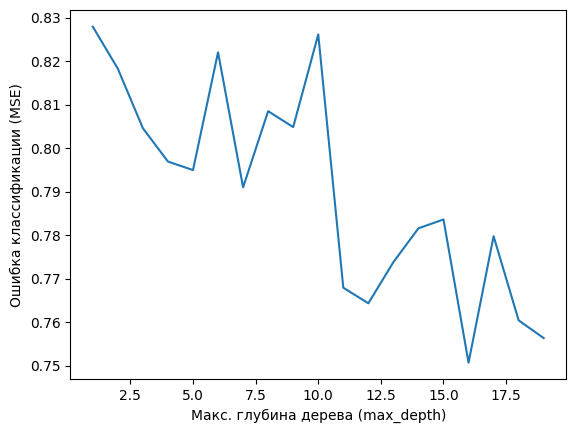

Оптимальные значения max_depth:  [16]


In [ ]:
from sklearn.model_selection import cross_val_score

# Значения параметра max_depth
d_list = list(range(1,20))
# Пустой список для хранения значений точности
cv_scores = []
# В цикле проходим все значения K
for d in d_list:
    tree = DecisionTreeClassifier(max_depth=d,
                                  random_state=21,
                                  max_features=2)
    scores = cross_val_score(tree, dX, dy, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]

# Строим график
plt.plot(d_list, MSE)
plt.xlabel('Макс. глубина дерева (max_depth)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

# Ищем минимум
d_min = min(MSE)

# Пробуем найти прочие минимумы (если их несколько)
all_d_min = []
for i in range(len(MSE)):
    if MSE[i] <= d_min:
        all_d_min.append(d_list[i])

# печатаем все K, оптимальные для модели
print('Оптимальные значения max_depth: ', all_d_min)

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import tree

dtc = DecisionTreeClassifier(max_depth=10, random_state=21, max_features=2)

tree_params = { 'max_depth': range(1,20), 'max_features': range(1,4) }
tree_grid = GridSearchCV(dtc, tree_params, cv=10, verbose=True, n_jobs=-1)
tree_grid.fit(dX, dy)

print('\n')
print('Лучшее сочетание параметров: ', tree_grid.best_params_)
print('Лучшие баллы cross validation: ', tree_grid.best_score_)

# Генерируем графическое представление лучшего дерева (сохранится в файле)
tree.export_graphviz(tree_grid.best_estimator_,
                     feature_names=dX.columns,
                     class_names=dy.unique(),
                     out_file='forestfire.dot',
                     filled=True, rounded=True)

Fitting 10 folds for each of 57 candidates, totalling 570 fits


Лучшее сочетание параметров:  {'max_depth': 16, 'max_features': 2}
Лучшие баллы cross validation:  0.2493212669683258


Оптимальное дерево решений


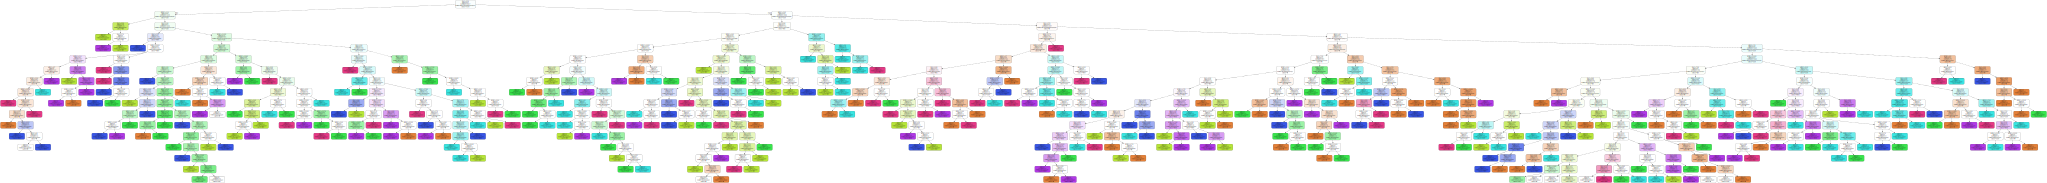

In [ ]:
# На самом деле можно визуализировать в Google Colab следующим бразом
import graphviz
dot_data = tree.export_graphviz(tree_grid.best_estimator_,
                     feature_names=dX.columns,
                     class_names=dy.unique(),
                     out_file=None,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)
print('Оптимальное дерево решений')
graph

In [ ]:
# Поэкспериментируем с визуализацией деревьев...
# max_features = 2, max_depth = 3
dtc = DecisionTreeClassifier(max_depth=5,
                             random_state=21,
                             max_features=1)
# Обучаем
dtc.fit(dX.values, dy)
# Предсказываем
res = dtc.predict([[5.1, 3.5, 1.4]])
print(res)

['mon']


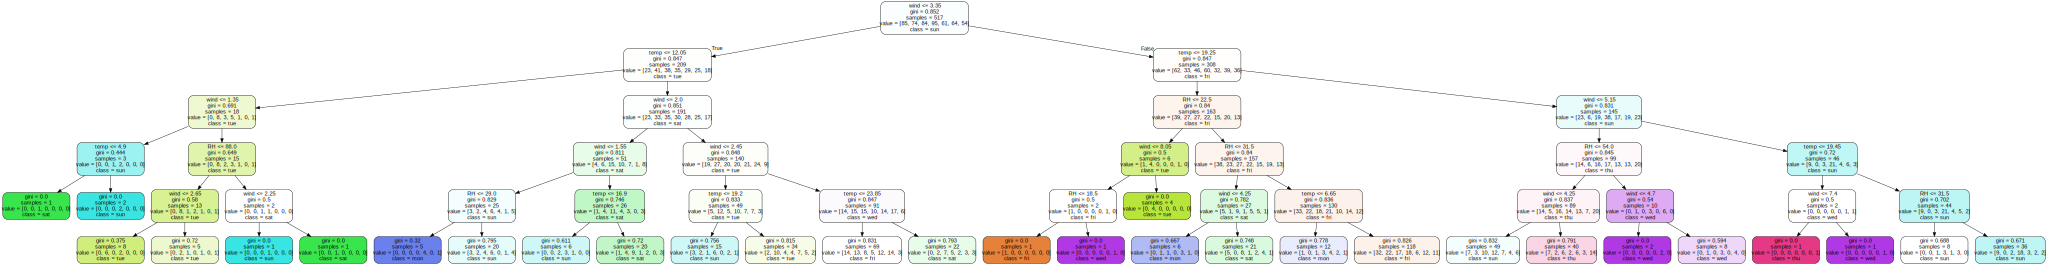

In [ ]:
dot_data = tree.export_graphviz(dtc,
                     feature_names=dX.columns,
                     class_names=dy.unique(),
                     out_file=None,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

Построим границы решений для модели

In [ ]:
# Палитры
print(sorted(list(plt.colormaps)))

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X

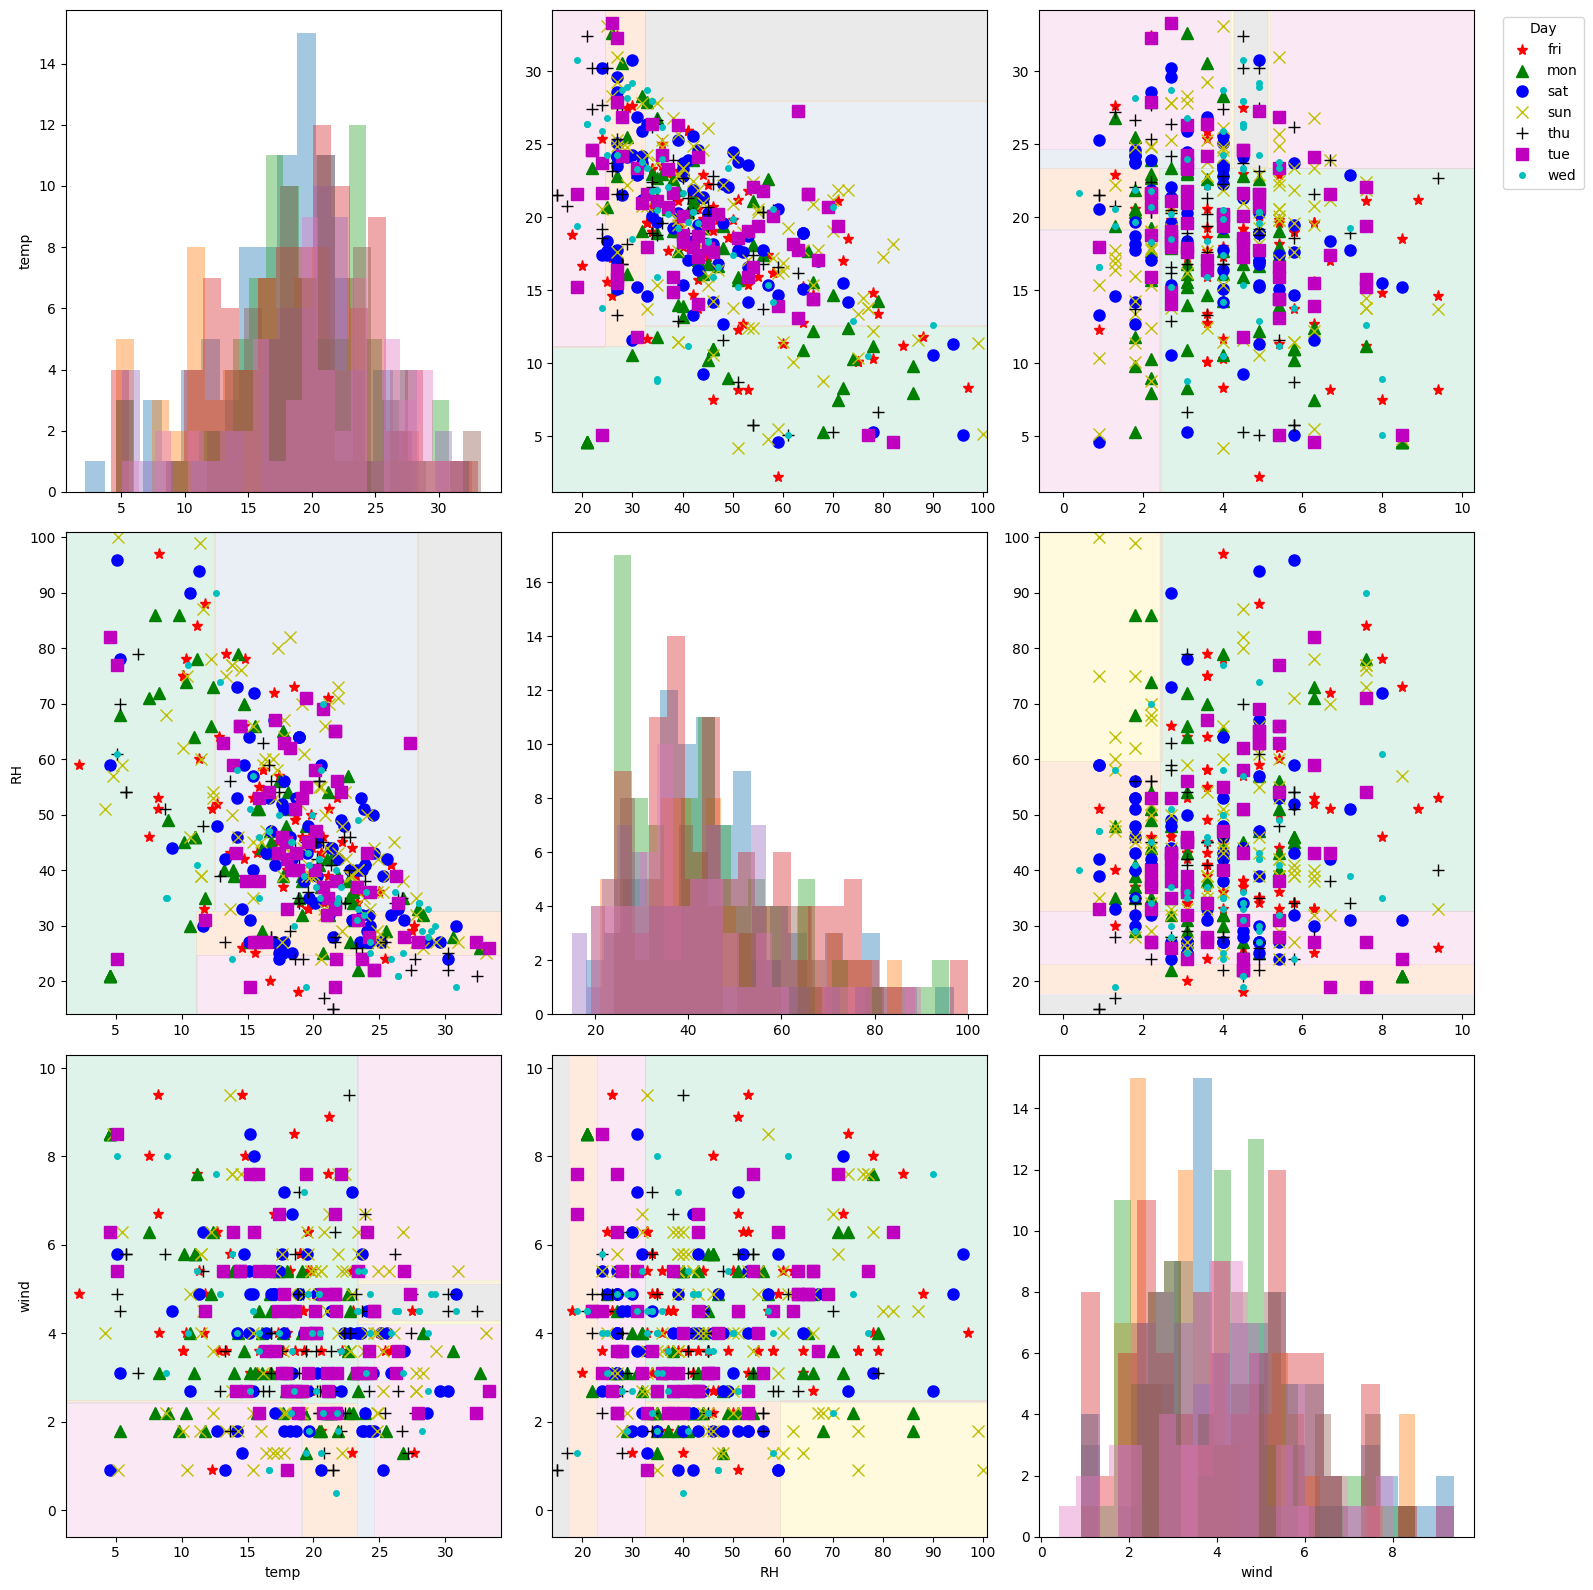

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Преобразование категориальной переменной в числовые метки

encoder = LabelEncoder()

dy_encoded = encoder.fit_transform(dy)



# Уникальные классы и маркеры для визуализации

answers = np.unique(dy_encoded)

plot_markers = ['r*', 'g^', 'bo', 'yx', 'k+', 'ms', 'c.', 'w<', 'b>'][:len(answers)]

labels = dX.columns.values



# Создание фигуры и осей для подграфиков

fig, axes = plt.subplots(nrows=len(labels), ncols=len(labels), figsize=(16, 16))



# Определение границ для построения сетки

fmin = dX.min().values - 1

fmax = dX.max().values + 1

plot_step = 0.1



# Обработка и визуализация данных на каждом подграфике

for i in range(len(labels)):

    for j in range(len(labels)):

        ax = axes[i, j]

        if i != j:

            # Построение решающих границ

            xx, yy = np.meshgrid(np.arange(fmin[j], fmax[j], plot_step), np.arange(fmin[i], fmax[i], plot_step))

            model = DecisionTreeClassifier(max_depth=3, random_state=42)

            model.fit(dX.iloc[:, [j, i]], dy_encoded)

            Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

            ax.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Pastel2)



        # Нанесение точек на график или гистограмм

        for idx, label in zip(answers, encoder.inverse_transform(answers)):

            points_idx = np.where(dy_encoded == idx)[0]  # получаем одномерный массив индексов

            if i == j:

                ax.hist(dX.loc[points_idx, labels[i]], bins=20, alpha=0.4, label=str(label))

            else:

                ax.plot(dX.loc[points_idx, labels[j]], dX.loc[points_idx, labels[i]], plot_markers[idx], label=str(label), markersize=8)



        # Названия осей

        if j == 0:

            ax.set_ylabel(labels[i])

        if i == len(labels) - 1:

            ax.set_xlabel(labels[j])



        # Легенда

        if i == 0 and j == len(labels) - 1:

            ax.legend(title='Day', bbox_to_anchor=(1.05, 1), loc='upper left')



# Вывод графика

plt.tight_layout()

plt.show()